# 튜토리얼 파트 2 Word 2 Vectors
https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/part-2-word-vectors  
- 딥러닝 기법인 Word2Vec을 통해 단어를 벡터화해본다.  
- t-SNE를 통해 벡터화한 데이터를 시각화해본다.  
- 딥러닝과 지도학습의 랜덤포레스트를 사용하는 하이브리드 방식을 사용한다.  

# Word2Vec(Word Embedding to Vector)
컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장된다.  
튜토리얼 파트1에서는 Bag of Word라는 개념을 사용해서 문자를 벡터화하여 머신러닝 알고리즘이 이해할 수 있도록 벡터화해주는 작업을 하였다.  
  
- one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않는다.  
- 주위 단어가 비슷하면 해당 단어의 의미는 유사하다라는 아이디어  
- 단어를 트레이닝시킬 때 주위 단어를 label로 매치하여 최적화  
- 단어를 의미를 내포한 dense vector로 매칭시키는 것  

- Word2Vec은 분산된 텍스트 표현을 사용하여 개념 간 유사성을 본다. 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해한다.

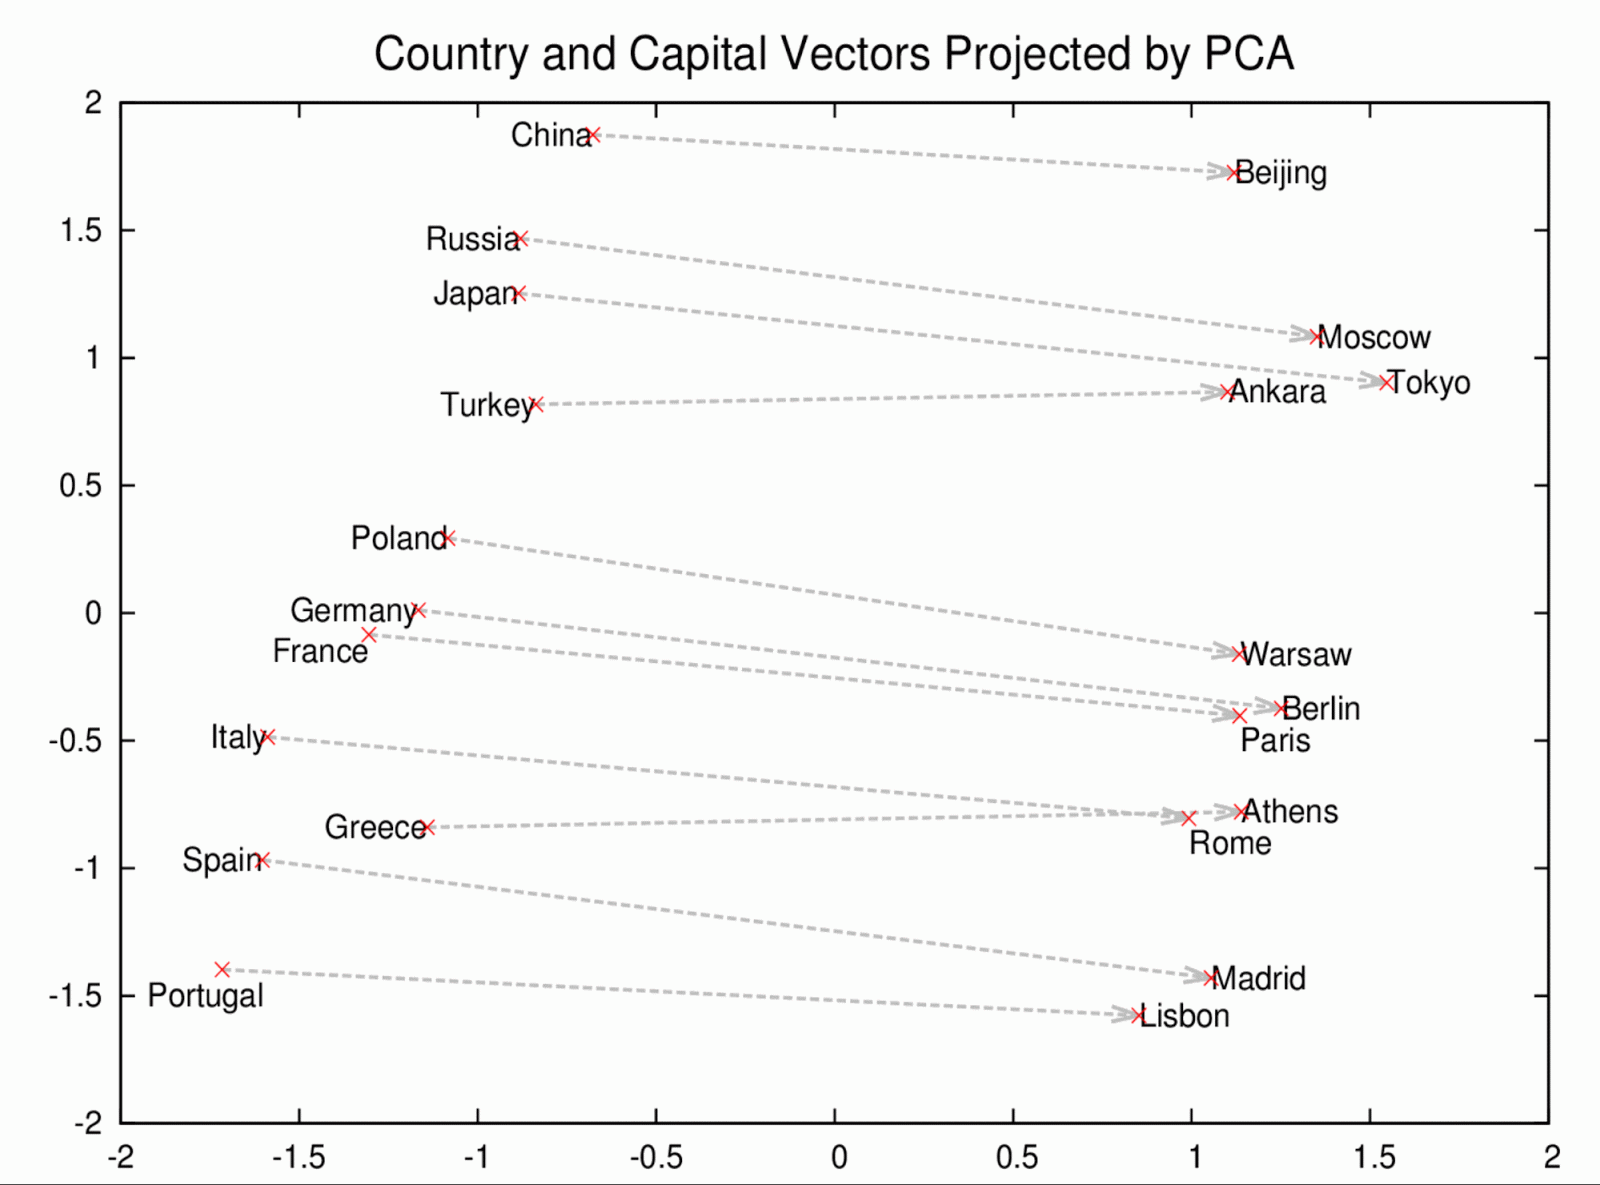

# one hot encoding

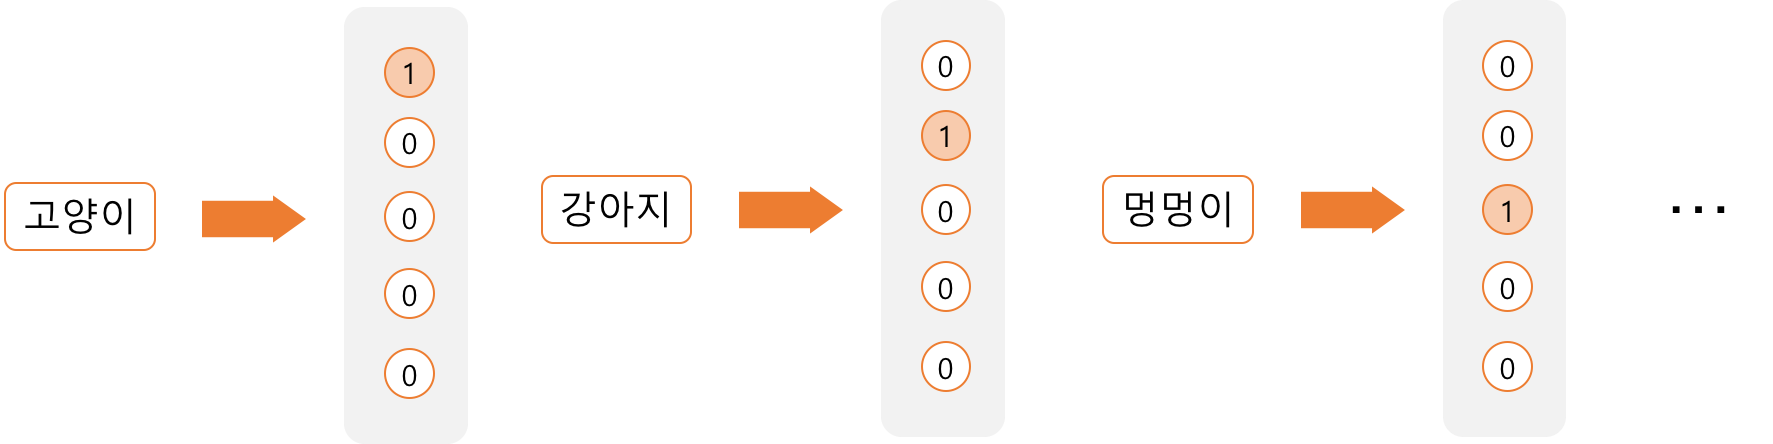

- 원핫인코딩은 많은 단어가 있는 문장에서 쓰기에는 vector size가 매우 커지고 sparse 하므로 neural net 성능을 기대하기 어렵다.  
- 이러한 표현 방법은 각 단어간 유사성을 표현할 수 없다는 단점이 있었고, 이를 위한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾게되는데, 이러한 표현 방법을 분산 표현(distributed representation)이라고 한다.
- 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 함.  
- 단어의 유사도를 기반으로 벡터화하는 작업도 워드 임베딩의 종류.   
- 이렇게 표현된 벡터는 임베딩 벡터(embedding vector)라고 한다.  

# Word2Vec
- Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있습니다. 
- CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다.  
- Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다.  (매커니즘은 거의 비슷)  
- 1. 저차원 표현  
- 2. 더 큰 일반화 능력  
https://ronxin.github.io/wevi/  



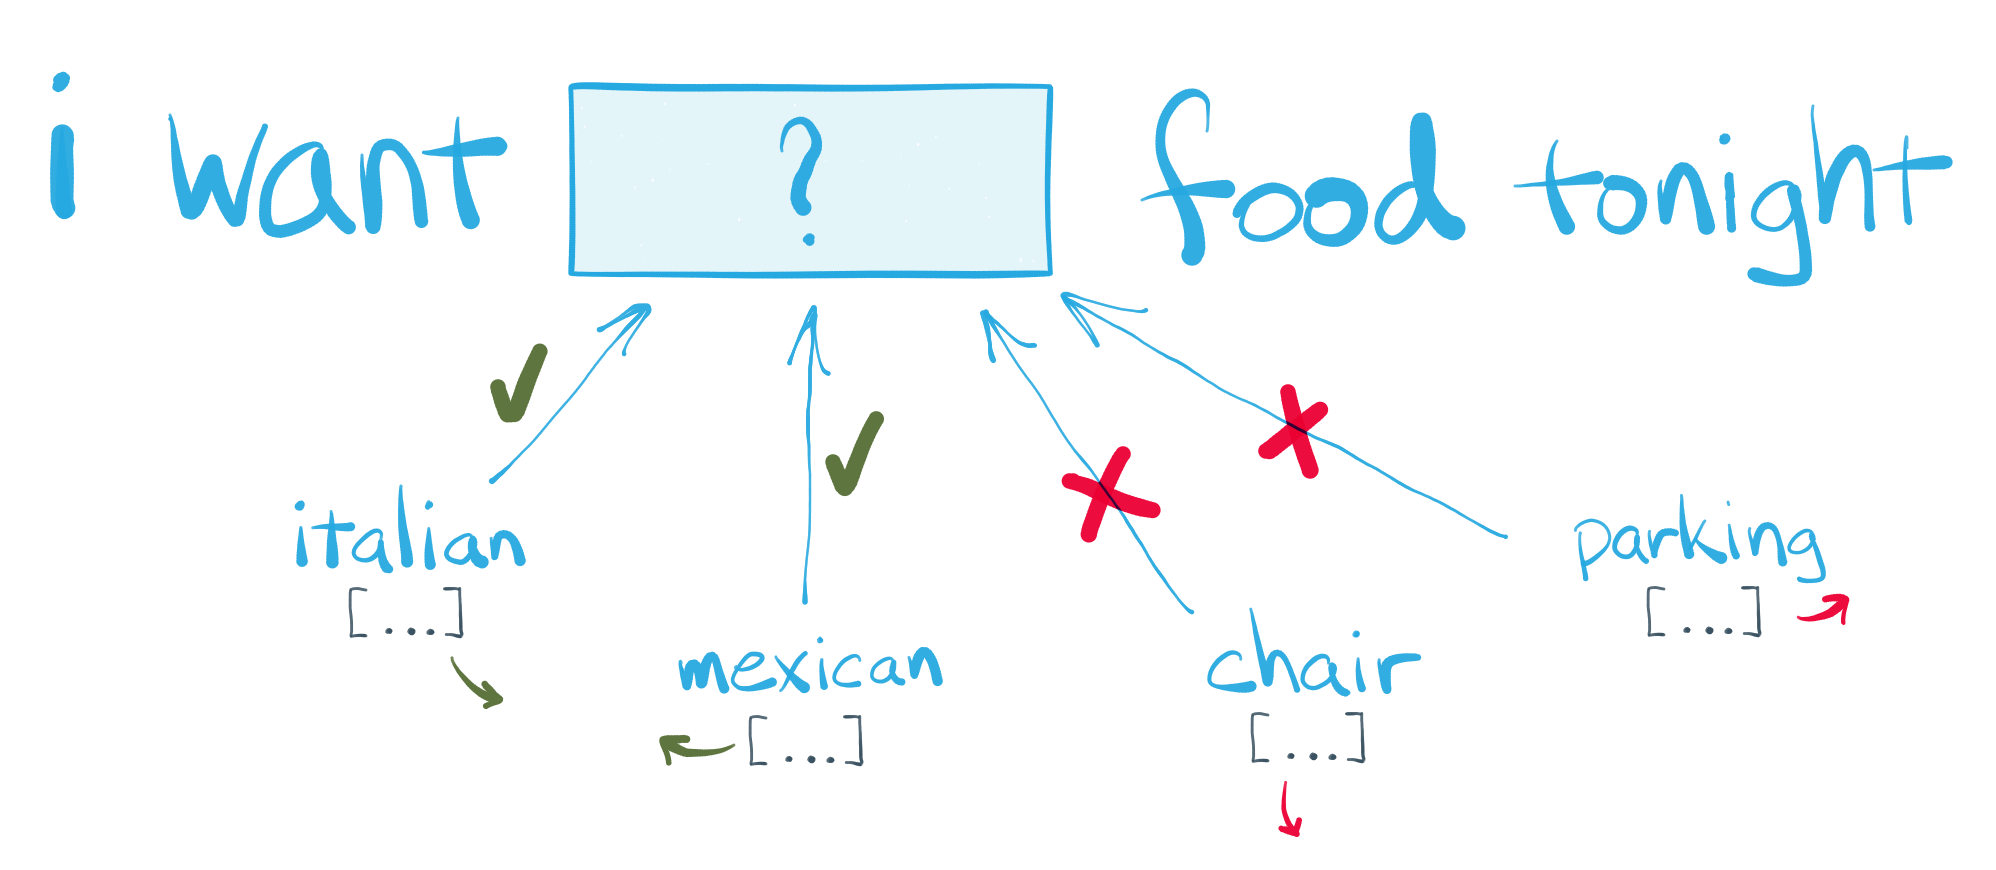  
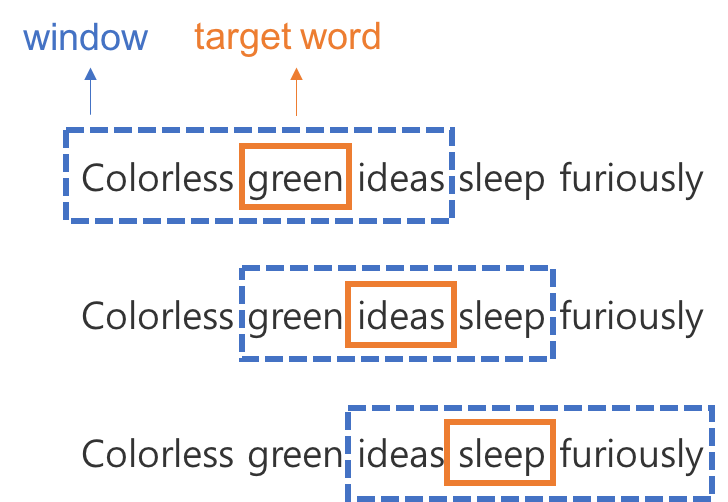

# Dense representation

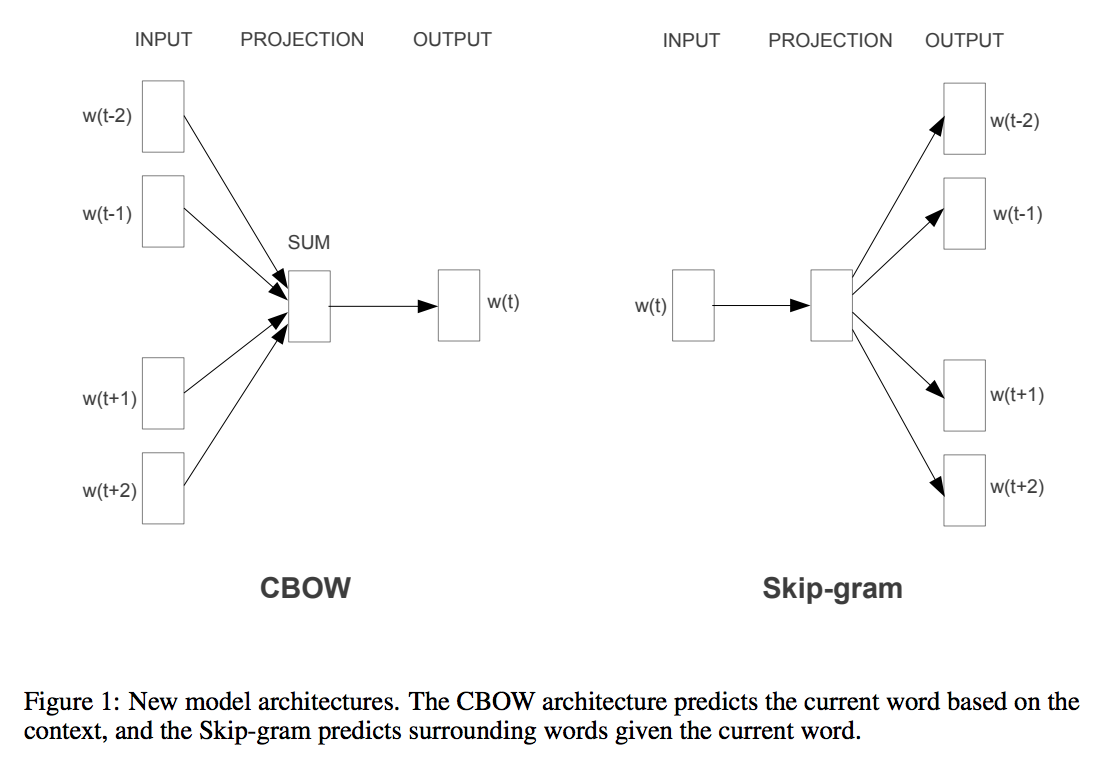

# Word2Vec 참고자료
- [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/word2vec/)  
- [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)    
- [딥러닝을 이용한 자연어 처리입문/워드투벡터](https://wikidocs.net/22660)  
- [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)    
- [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)  
  
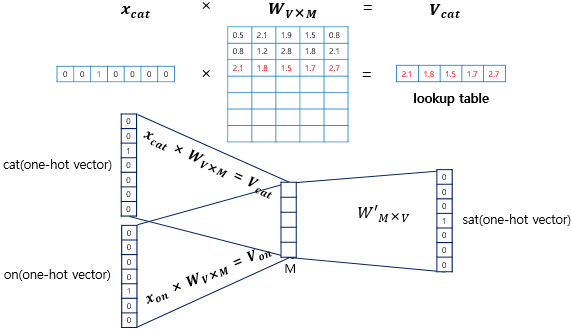  
- i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일.
- W를 룩업 테이블(lookup table)이라 함.
- 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터.
  
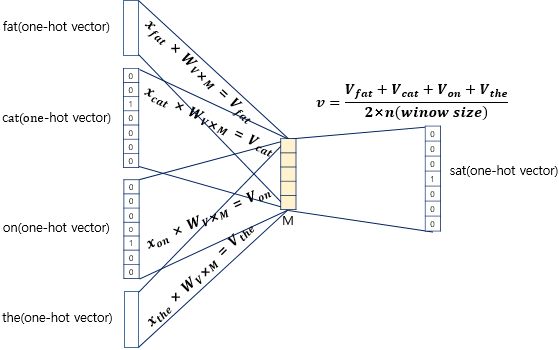  
  
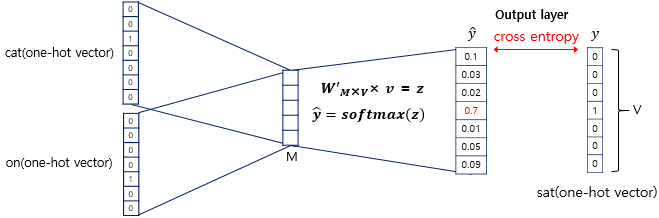  

# Gensim
- [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)  
- [gensim: Tutorials](https://radimrehurek.com/gensim/auto_examples/index.html#core-tutorials)  
- [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)  

In [1]:
# 출력이 너무 길어지지 않게 하기 위해 찍지 않도록 했으나
# 실제 학습할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

데이터  
https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [3]:
import pandas as pd
"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 큰따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1), 
# QUOTE_NONNUMERIC (2) or QUOTE_NONE (3)

train = pd.read_csv('D:/word2vec-nlp-tutorial/labeledTrainData.tsv', 
                    header=0, delimiter='\t',quoting=3)
test = pd.read_csv('D:/word2vec-nlp-tutorial/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('D:\word2vec-nlp-tutorial/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [5]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
# train에 있는 평점 정보인 sentiment가 없다.
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [10]:
# html 태그가 섞여 있기 때문에 이를 정제해줄 필요가 있음
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

# 데이터 정제 Data Cleaning and Text Preprocessing
기계가 텍스트를 이해할 수 있도록 텍스트를 정제해 준다.  
 
- BeautifulSoup(뷰티풀숩)을 통해 HTML 태그를 제거
- 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
- NLTK 데이터를 사용해 불용어(Stopword)를 제거
- 어간추출(스테밍 Stemming)과 표제어추출(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간을 추출
- 텍스트 데이터 전처리 이해하기  

한국어 처리는? [한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text)


In [9]:
# 설치 및 버전확인
#!pip install BeautifulSoup4
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.9.3
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\yeonuk\anaconda3\lib\site-packages
Requires: soupsieve
Required-by: conda-build


In [12]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.

letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [14]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

# 불용어 제거(Stopword Removal)
일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다. 예를 들어 조사, 접미사, i, me, my, it, this, that, is, are 등과 같은 단어는 빈번하게 등장하지만, 실제 의미를 찾는데 크게 기여하지 않는다. Stopwords는 to또는 the와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153개의 영어 불용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.

In [13]:
#pip install nltk (아나콘다 설치했으면 기본으로 깔려있음)

!pip show nltk

Name: nltk
Version: 3.5
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: c:\users\yeonuk\anaconda3\lib\site-packages
Requires: regex, tqdm, click, joblib
Required-by: 


In [15]:
import nltk
#nltk.download('stopwords') # 최초로 시행할 때만 해주면 됨
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

## __스테밍(어간추출, 형태소 분석)__  
출처 : 어간 추출 - 위키백과, 우리 모두의 백과사전

- 어간 추출(語幹 抽出, 영어: stemming)은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것
- message, messages, messaging과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.
- stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다. 참고 : 모두의 데이터 과학 with 파이썬(길벗)

In [17]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [18]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [18]:
# 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [19]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# __Lemmatization 표제어추출__

https://wikidocs.net/21707

참고 :  
[Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)    
[Lemmatisation - Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation)  

Stemming  
am → am  
the going → the go 
having → hav  

Lemmatization  
am → be  
the going → the going  
having → have  

In [19]:
# nltk.download('wordnet') 최초실행시 다운로드
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

fly
fly


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

# 문자열 처리
__위의 배운 내용들을 바탕으로 문자열 처리하는 함수를 만들어 봅시다.__

In [25]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환 + 토큰화
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는 게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 표제어 추출
    stemmer = nltk.stem.PorterStemmer()
    stemerize_words = [ stemmer.stem(w) for w in meaningful_words ]
    #Lemmatization_words = [wordnet_lemmatizer.lemmatize(w) for w in meaningful_words]
    
    # 보기 편하려면 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemerize_words) )

In [26]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay 

In [27]:
# 첫 번째 리뷰를 대상으로 전처리해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = train['review'].size
num_reviews


25000

In [28]:
"""
clean_train_reviews = []
캐글 튜토리얼에는 range가 xrange로 되어있지만 
여기에서는 python3를 사용하기 때문에 range를 사용했다.
"""
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))
"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# clean_train_reviews = []
# for i in range(0, num_reviews):
#     if (i + 1)%5000 == 0:
#         print('Review {} of {} '.format(i+1, num_reviews))
#     clean_train_reviews.append(review_to_words(train['review'][i]))

"""
그리고 코드를 좀 더 간결하게 하려고 for loop를 사용하는
대신 apply를 사용하도록 개선
"""
%time train['review_clean'] = train['review'].apply(review_to_words)



Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 
Wall time: 1min 2s


In [25]:
#!pip install wordcloud

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

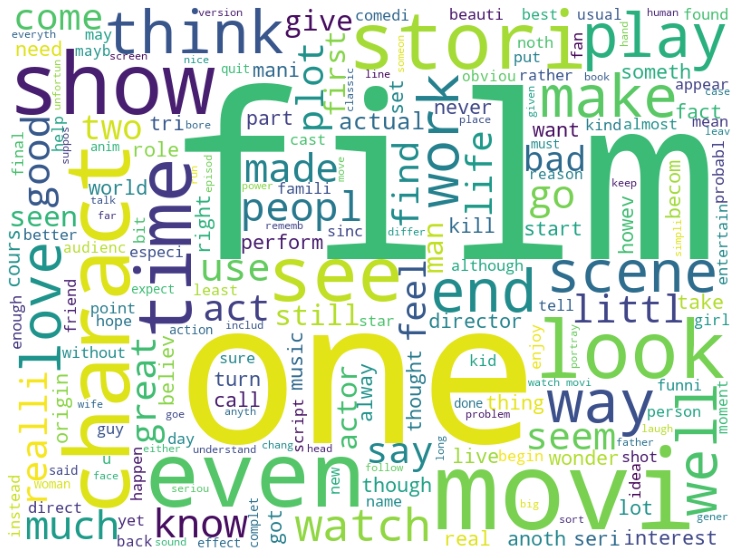

In [30]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
displayWordCloud(' '.join(train['review_clean']))

### __Gensim을 통해 벡터화 & t-SNE로 시각화
### Word2Vec 모델을 학습
전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 되었다.

### Word2Vec 모델의 파라메터
- 아키텍처 : 아키텍처 옵션은 skip-gram (default) 또는 CBOW 모델이다. skip-gram (default)은 느리지만 더 나은 결과를 낸다.

- 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.

- 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.

- 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.

- 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야 하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10 정도가 적당하다.

- Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6 사이의 값을 사용하다.

- 최소 빈도 수 : 어휘의 크기를 의미 있는 단어로 제한하는 데 도움이 된다. 모든 문서에서 여러 번 발생하지 않는 단어는 무시된다. 10에서 100 사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하고자 최소 빈도 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.

In [34]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는 게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 형태소 추출
    stemmer = nltk.stem.PorterStemmer()
    stemerize_words = [ stemmer.stem(w) for w in meaningful_words ]
    # 6. 표제어 추출
    #Lemmatization_words = [wordnet_lemmatizer.lemmatize(w) for w in meaningful_words]
    return( stemerize_words )

In [35]:
train['review_clean'] = train['review'].apply(review_to_words)

In [28]:
# !pip install gensim

In [36]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_count = 40 # 최소 빈도 수
num_workers = 4 # 병렬 처리 스레드 수 (cpu 사양따라서..)
window = 10 # 윈도우 사이즈


# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(train['review_clean'], 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_count,
                          window=window,
                          )
model

In [37]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text.model'

model.save(model_name)

## 모델 결과를 확인해 봅시다.
Exploring the Model Results

In [31]:
!pip show gensim

Name: gensim
Version: 3.8.3
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: c:\users\yeonuk\anaconda3\lib\site-packages
Requires: Cython, scipy, six, smart-open, numpy
Required-by: 


In [38]:
'man woman child kitchen'.split()

['man', 'woman', 'child', 'kitchen']

In [40]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [41]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.605334997177124),
 ('ladi', 0.4716310203075409),
 ('men', 0.4506218433380127),
 ('blind', 0.41639310121536255),
 ('conscienc', 0.4100522994995117),
 ('innoc', 0.4082738757133484),
 ('doctor', 0.4050198197364807),
 ('lawyer', 0.3924487233161926),
 ('gino', 0.3923562169075012),
 ('invis', 0.39200976490974426)]

In [42]:
model.wv.most_similar("queen")

[('princess', 0.8311835527420044),
 ('bride', 0.7514057159423828),
 ('roman', 0.748327374458313),
 ('holt', 0.7419220209121704),
 ('lad', 0.7414032220840454),
 ('companion', 0.7405602335929871),
 ('ruth', 0.7363095283508301),
 ('june', 0.7353300452232361),
 ('wang', 0.7349209189414978),
 ('thief', 0.7289100885391235)]

In [43]:
model.wv.most_similar("film")

[('movi', 0.5448276996612549),
 ('cinema', 0.5440422296524048),
 ('certainli', 0.5348715782165527),
 ('filmmak', 0.49174439907073975),
 ('indi', 0.4842188358306885),
 ('nevertheless', 0.464855819940567),
 ('pictur', 0.45603907108306885),
 ('worthwhil', 0.4550565481185913),
 ('flick', 0.45451539754867554),
 ('masterpiec', 0.4524935483932495)]

In [45]:
#model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시 

[('bitter', 0.6407884955406189),
 ('joy', 0.6256265044212341),
 ('sad', 0.6249549388885498),
 ('heartwarm', 0.6119723320007324),
 ('depress', 0.5787338018417358),
 ('warm', 0.5482714176177979),
 ('tear', 0.5410431623458862),
 ('realiz', 0.534879207611084),
 ('happili', 0.5347942113876343),
 ('cri', 0.5322189927101135)]

In [46]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

<ipython-input-46-410ae2e08ce8>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


6466
[ 0.26826248 -0.07662605  0.13682815 -0.01563496  0.1475989   0.02513481
  0.02390222 -0.02232299  0.00221005  0.04227009]


In [47]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [48]:
df.head(10)

,x,y
stuff,0.513071,2.088804
go,-2.800274,3.792148
moment,4.573908,-0.546659
start,-3.818683,4.395317
listen,-1.888986,6.757209
music,3.030619,-0.415396
watch,-1.734012,5.489116
odd,3.323152,1.904220
documentari,3.562508,5.616556
mayb,-0.292980,4.155252


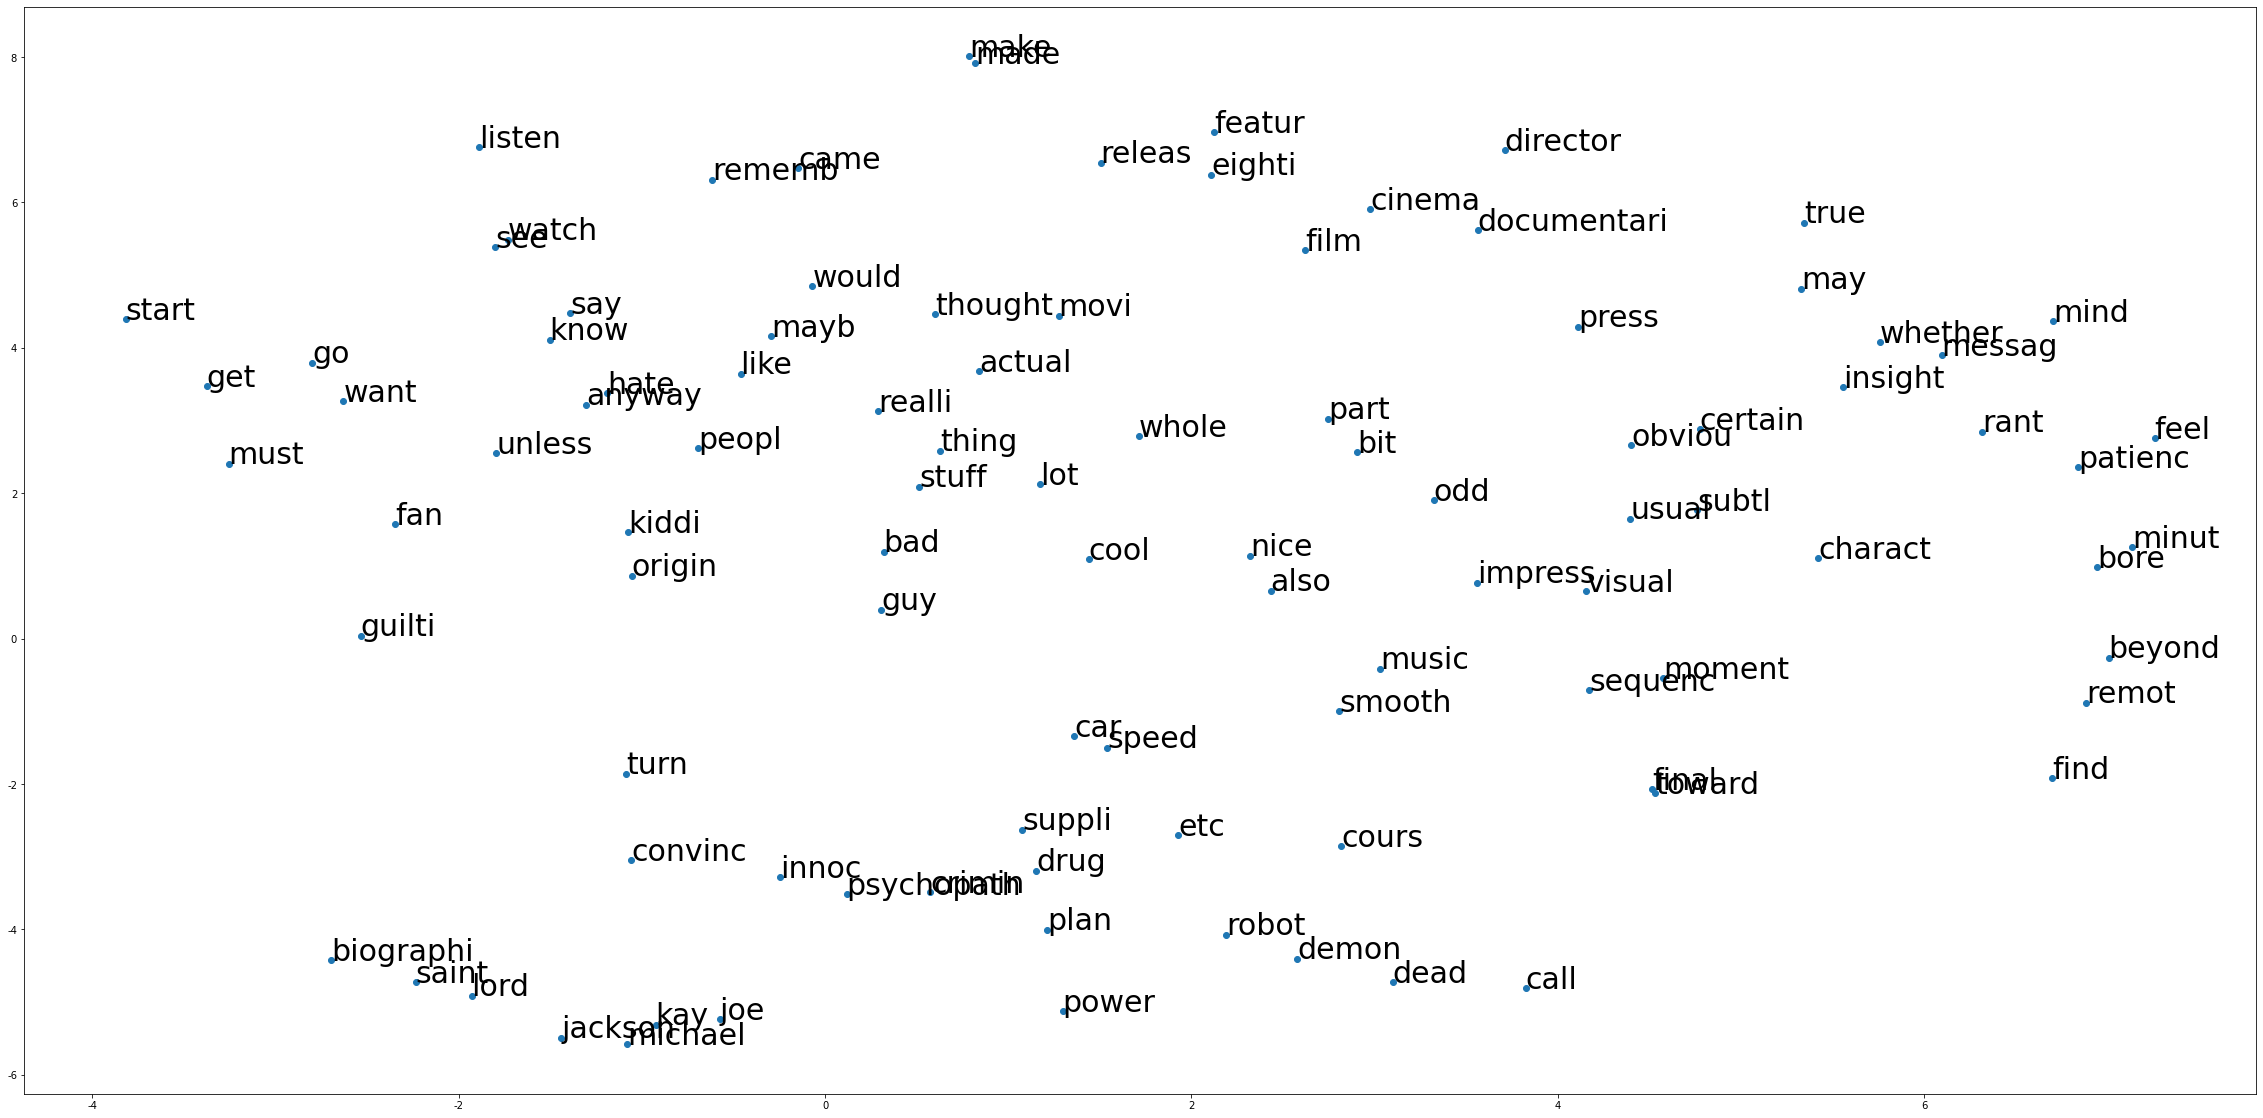

In [49]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()